# Analiz

In [149]:
import pandas as pd
import numpy as np

In [150]:
data = pd.read_csv("Housing.csv")

Veri kümesi 1338 satır ve 21 sütun içermektedir. Her satır, bir ev satışına ilişkin bilgileri içerir. Amacımız, diğer sütunlardaki değerleri kullanarak "price" sütunundaki değeri tahmin etmektir. Bu sayede, evin özelliklerine dayanarak yeni satışların fiyatlarını tahmin edebiliriz.

Veri kümesinde yer alan sütunlar şunlardır:

In [151]:
# Veri kümesi hakkında bilgi
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [152]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [153]:
# Eksik değerleri kontrol et
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


Verilere kontrol ettiğimizde boş değerimiz bulunmamaktadır. Bu yüzden eksik verileri tamamlama adımını atlıyoruz.

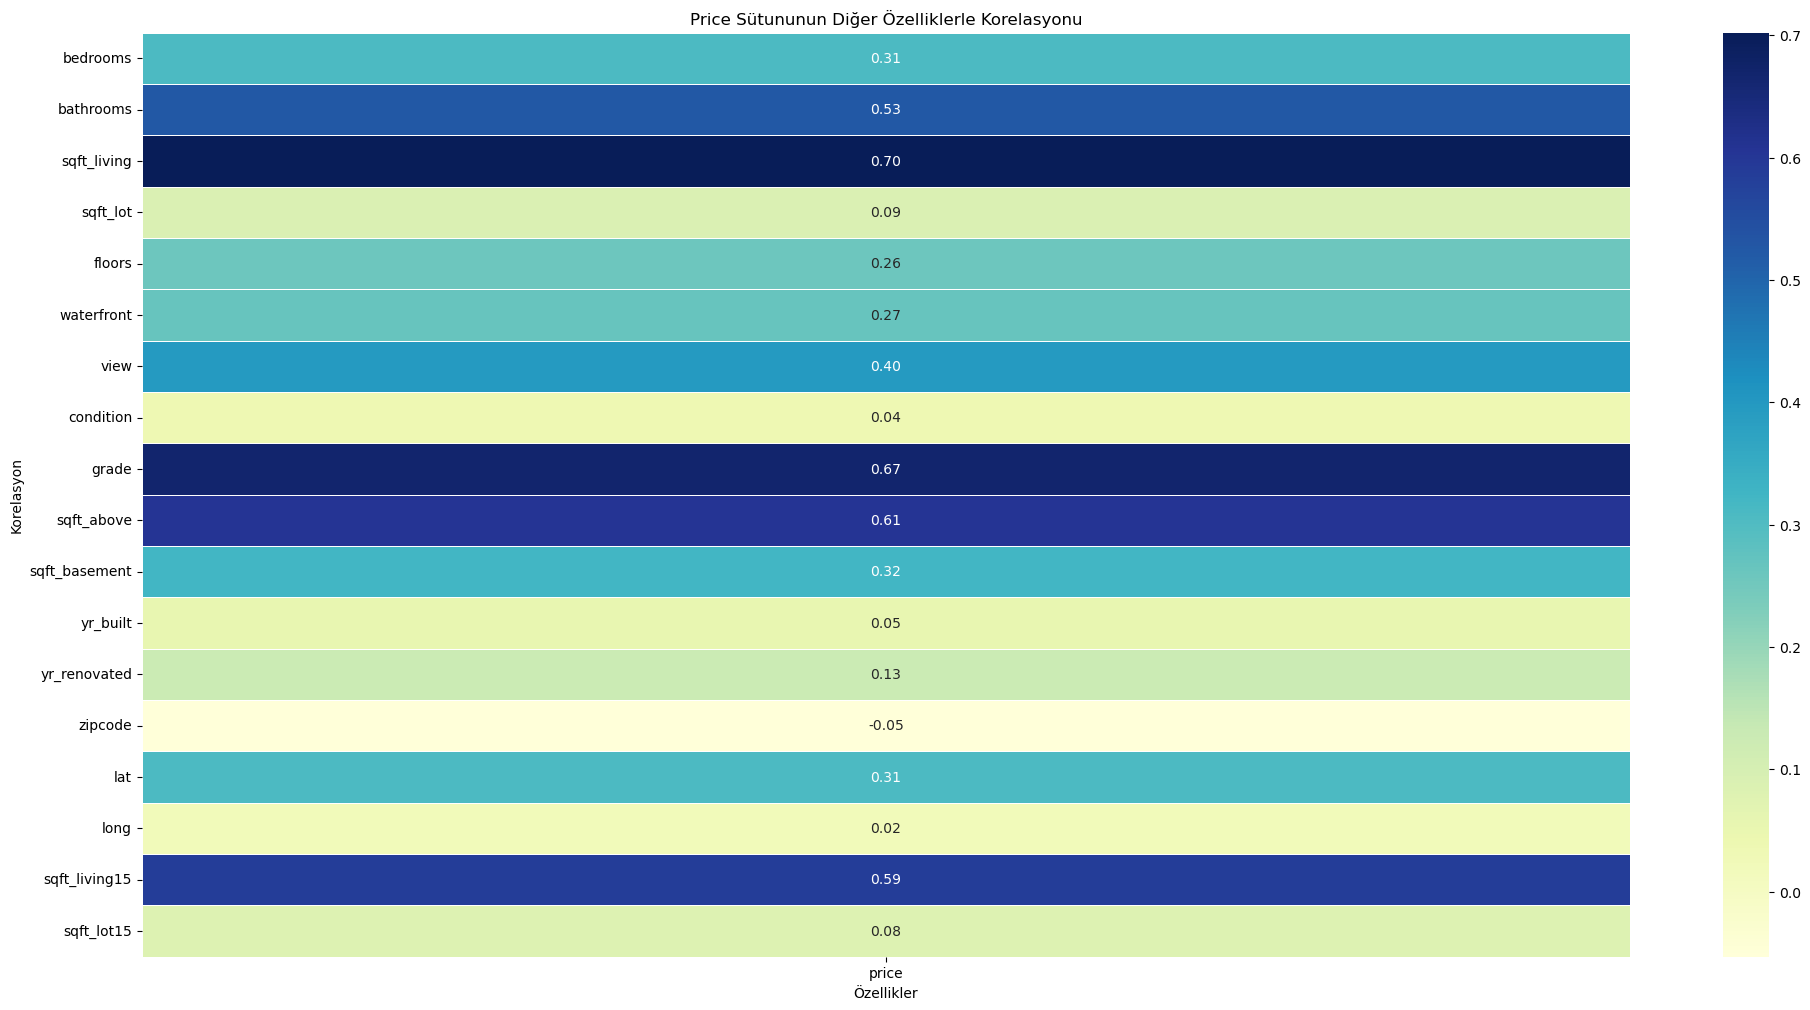

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini hesaplama
heat_data = data.drop(["date"], axis=1).corr()

# 'price' sütununun diğer sütunlarla olan korelasyonunu alma
price_corr = heat_data[['price']].drop(['id', 'price'])  # Sadece 'price' sütununu al ve 'price' sütununu çıkar

# Heatmap oluşturma
plt.figure(figsize=(24, 12))  # Grafik boyutunu ayarlama
sns.heatmap(price_corr, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)

# Grafik başlığı ve etiketler
plt.title('Price Sütununun Diğer Özelliklerle Korelasyonu')
plt.xlabel('Özellikler')
plt.ylabel('Korelasyon')
plt.show()


sqft_living: Yaşam alanı büyüklüğü metrekare cinsinden

grade: Genel not derecesi (1 ila 13) kategorik değişken yap iyi orta kötü

sqft_above: Zemin seviyesinden yüksek yaşam alanı metrekare cinsinden

sqft_living15: En yakın 15 mülkün yaşam alanı büyüklüğü metrekare cinsinden

bathrooms: Banyo sayısı

Price (fiyat) değerinin diğer değerler ile arasında ki ilişkiye bakıyoruz. 

sqft_living, grade, sqft_above, sqft_living15, bathrooms sütunları ile arasında doğru orantı vardır.

In [155]:
data["sqft_above"].value_counts()

sqft_above
1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
3674      1
2979      1
2382      1
6290      1
1425      1
Name: count, Length: 946, dtype: int64

In [156]:
data["grade"].value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

In [157]:
import folium

f = folium.Figure(width=500, height=500)
map = folium.Map(location=[data.lat.mean(), data.long.mean()], zoom_start=10).add_to(f)
folium.Marker(location=[data.lat.mean(), data.long.mean()], popup='Merkez Noktamız').add_to(map)

for i in range(10):
    sample_data = data.sample()
    folium.Marker(location=[sample_data.lat, sample_data.long], popup=f'Ev {i+1}').add_to(map)

map

/opt/anaconda3/lib/python3.11/site-packages/folium/utilities.py:94: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(coord)
/opt/anaconda3/lib/python3.11/site-packages/folium/utilities.py:100: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if math.isnan(float(coord)):
/opt/anaconda3/lib/python3.11/site-packages/folium/utilities.py:102: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(x) for x in coords]


# Ön İşleme

In [158]:
data = data.drop(["id"], axis=1)

In [159]:
# Tarih sütununu yıl ve ay olarak ayır
data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data.drop('date', axis=1, inplace=True)

Tarih sütununu formatladıktan sonra yıl ve ay değerlerini ayrı sütun olarak ayırıyoruz.

In [160]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


- Enlem boylam haritalandırma
- grade dağılımlar bak. pd.cut one hot kötü iyi çok iyi
- posta koduna göre fiyat dağılımı
- float değerinde bathrooms olamaz yuvarla

In [161]:
grade_data = data["grade"].value_counts()
grade_data

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

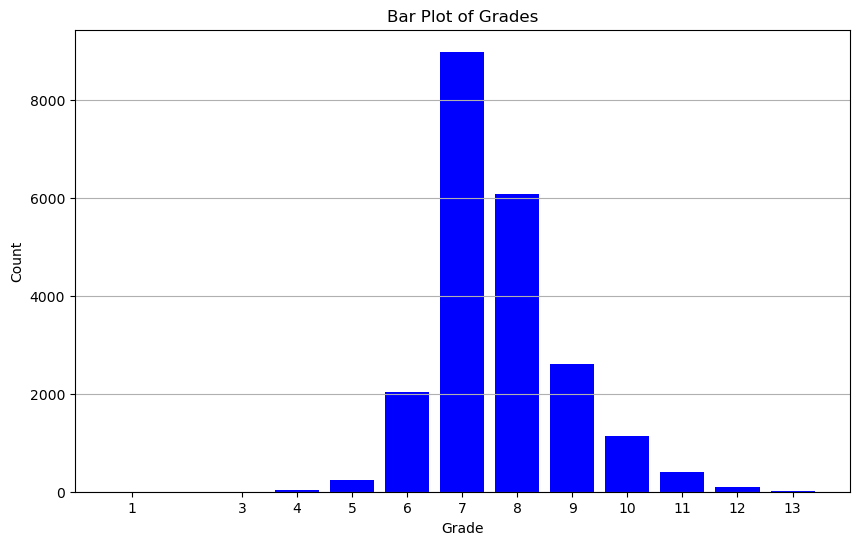

In [162]:
# Verileri x ve y eksenlerine ayırın
grades = grade_data.index
counts = grade_data.values

# Bar plot oluştur
plt.figure(figsize=(10, 6))
plt.bar(grades, counts, color='blue')

# Grafiği düzenle
plt.title('Bar Plot of Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(grades)  # X eksenindeki değerleri doğru şekilde etiketle
plt.grid(axis='y')

# Grafiği göster
plt.show()

Grade sütunu dağılımlara baktığımızda bazı değerlerin çok yüksek bazı değerlerin az olması sebebiyle bu değerleri kategorik veri haline dönüştürüldü böylece model performansı arttırılması amaçlandı.

In [163]:
# kötü orta iyi

def categorize(value):
    if value < 7:
        return "kötü"
    elif 7 <= value <= 9:
        return "orta"
    else:
        return "iyi"

# Verileri kategorilere ayır
categorized_data = data["grade"].apply(categorize)
data["grade"] = categorized_data
data["grade"]

0        orta
1        orta
2        kötü
3        orta
4        orta
         ... 
21608    orta
21609    orta
21610    orta
21611    orta
21612    orta
Name: grade, Length: 21613, dtype: object

In [164]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(data[["grade"]])
enc.categories_

[array(['iyi', 'kötü', 'orta'], dtype=object)]

In [165]:
one_hot = enc.transform(data[["grade"]]).toarray()
one_hot

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [166]:
encoded_cols = list(enc.get_feature_names_out(['grade']))
data[encoded_cols] = one_hot
data.drop(["grade"], axis=1, inplace=True)

Bathrooms değeri float olamaz yuvarla.

In [167]:
data['bathrooms'] = round(data['bathrooms'])

In [168]:
numeric_cols = data.drop(["price"], axis=1).select_dtypes(include=np.number).columns

In [169]:
from sklearn.preprocessing import MinMaxScaler

In [170]:
scaler = MinMaxScaler().fit(data[numeric_cols])

In [171]:
data[numeric_cols] = scaler.transform(data[numeric_cols])

# Model

In [172]:
# Özellikler (X) ve hedef değişkeni (y) tanımla
X = data.drop(['price'], axis=1)
y = data['price']

Tahmin etmek istediğimiz değer price (fiyat) olduğu için data dan price sütunu çıkarıp X değişkenine atıyoruz.
Y değişkenine yani hedef değişkenimize price sütununun değerlerini atıyoruz.

In [173]:
from sklearn.model_selection import train_test_split

# Eğitim ve test verisi olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Verilerimizi %70 eğitim ve %30 test olarak 2 ye ayırıyoruz. 

In [174]:
from sklearn.linear_model import LinearRegression

# Linear Regression modeli eğit
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

LinearRegression modelimize verilerimizi vererek eğitim verilerimiz ile eğitiyoruz.

In [175]:
y_lr_pred = lr_model.predict(X_test)

Test verilerimizi tahmin ediyoruz.

In [186]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# MAE
mae = mean_absolute_error(y_test, y_lr_pred)
print(f"MAE: {mae}")

# MSE
mse = mean_squared_error(y_test, y_lr_pred, squared=False)
print(f"MSE: {mse}")

# RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# MAPE
mape = mean_absolute_percentage_error(y_test, y_lr_pred) * 100
print(f"MAPE: {mape}%")

# print(f"Linear Regression ESKİ RMSE: 460.47377553177955")
# print(f"Linear Regression RMSE: {rmse}")
# print(f"Linear Regression mape: {round(mape)} %")
#457.5854653080385

MAE: 128926.16810610735
MSE: 209119.46060553752
RMSE: 457.29581301990675
MAPE: 24.877278622668985%


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**RMSE (Root Mean Squared Error - Kök Ortalama Kare Hatası): 460.47377553177955**
   - RMSE, MSE'nin kareköküdür ve hataların büyüklüğünü aynı ölçekte verir. RMSE, modelin tahminlerinin gerçek değerlerden ortalama olarak 212,036 birim sapma gösterdiğini belirtir. Yine bu değer oldukça yüksek, bu da modelin performansının zayıf olduğunu işaret eder.

Modeliniz bazı iyi tahminler yapabiliyor olabilir, ancak genel olarak hatalar oldukça yüksek ve tahminlerin doğruluğu istenilen seviyede değil. Modelin performansını artırmak için daha fazla veri toplamak, mevcut verileri iyileştirmek veya daha karmaşık modeller denemek gibi stratejiler uygulanabilir.

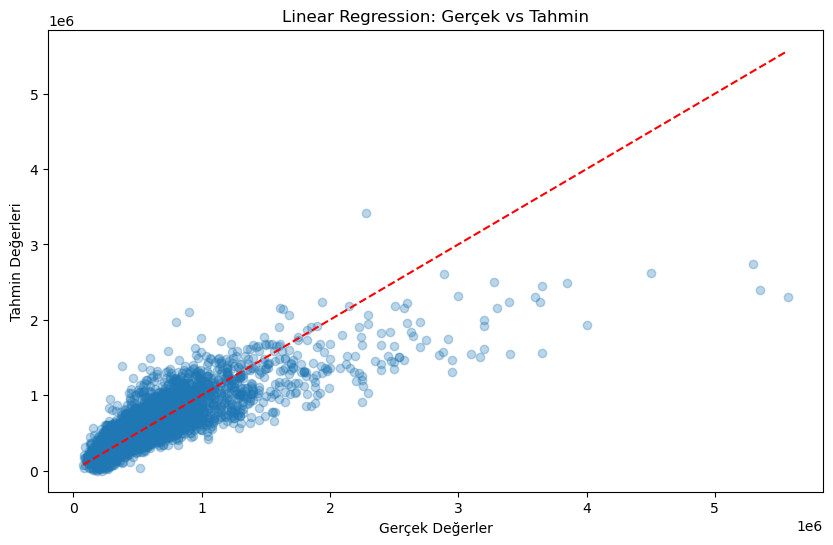

In [177]:
import matplotlib.pyplot as plt

# Tahmin ve gerçek değerleri karşılaştırma grafiği
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_lr_pred, alpha=0.3)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('Linear Regression: Gerçek vs Tahmin')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

In [178]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor modeli eğit
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

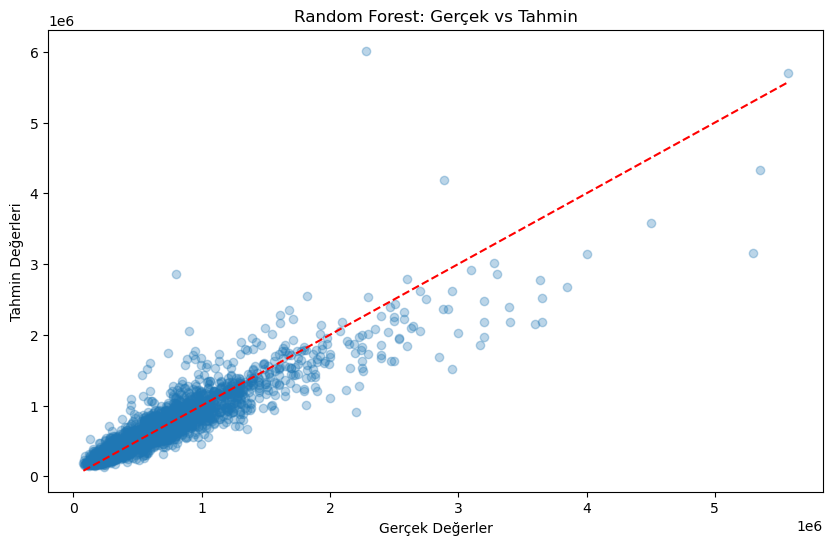

In [179]:
# Tahmin ve gerçek değerleri karşılaştırma grafiği
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_rf_pred, alpha=0.3)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('Random Forest: Gerçek vs Tahmin')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


In [180]:
# Test setinde tahmin yap
y_rf_pred = rf_model.predict(X_test)

# MAE
mae = mean_absolute_error(y_test, y_rf_pred)
print(f"MAE: {mae}")

# MSE
mse = mean_squared_error(y_test, y_rf_pred, squared=False)
print(f"MSE: {mse}")

# RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# MAPE
mape = mean_absolute_percentage_error(y_test, y_rf_pred) * 100
print(f"MAPE: {mape}%")

MAE: 74052.2163834053
MSE: 145839.74569008747
RMSE: 381.8897035664715
MAPE: 13.610561743793578%


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [181]:
# !pip install lightgbm

In [184]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2316
[LightGBM] [Info] Number of data points in the train set: 15129, number of used features: 22
[LightGBM] [Info] Start training from score 537640.173177


In [183]:
# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

# MSE
mse = mean_squared_error(y_test, y_pred, squared=False)
print(f"MSE: {mse}")

# RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# MAPE
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print(f"MAPE: {mape}%")

MAE: 71988.30853028814
MSE: 135813.01959059323
RMSE: 368.52818018517013
MAPE: 13.336396235203035%


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
